In [2]:
import pandas as pd
from sodapy import Socrata
import json
import requests as req
import matplotlib.pyplot as plt
import numpy as np
from requirements import *

#Connecting to API
length_data = 468,761
app_token = "X2gMakh5B2retT4oRxgQy2A9R"
#$$app_token=" + app_token
url = ("https://data.cityofnewyork.us/resource/7x9x-zpz6.json?$limit=4000&$offset=0")

results = req.get(url).json()

#put json data into dataframe
results_df = pd.DataFrame(data = results, columns = {"boro_nm", "rpt_dt", "ofns_desc","lat_long","law_cat_cd","prem_typ_desc"})

#rename columns
cleaned_df = results_df.rename(columns = {"boro_nm":"Borough", "rpt_dt": "Report Date", "ofns_desc": "Offense Decription", "lat_long":"Location", 
                                          "law_cat_cd":"Degree Of Crime", "prem_typ_desc":"Location Type"})

cleaned_df.head()


,Location,Offense Decription,Location Type,Report Date,Degree Of Crime,Borough
0,NaN,SEX CRIMES,STREET,2017-01-27T00:00:00.000,MISDEMEANOR,BROOKLYN
1,NaN,SEX CRIMES,RESIDENCE - APT. HOUSE,2017-03-20T00:00:00.000,FELONY,BRONX
2,NaN,RAPE,RESIDENCE - APT. HOUSE,2017-03-22T00:00:00.000,FELONY,BROOKLYN
3,NaN,SEX CRIMES,TRANSIT - NYC SUBWAY,2017-01-05T00:00:00.000,MISDEMEANOR,MANHATTAN
4,NaN,SEX CRIMES,STREET,2017-03-22T00:00:00.000,MISDEMEANOR,QUEENS


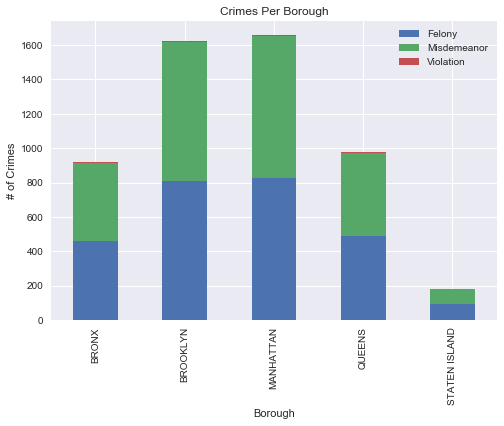

In [3]:
#MISDEMEANOR
mis_filter = cleaned_df['Degree Of Crime']=='MISDEMEANOR'
mis_final = cleaned_df[mis_filter]
borough_1_df = mis_final['Borough'].value_counts()

#FELONY
fel_filter = cleaned_df['Degree Of Crime']=='FELONY'
fel_final = cleaned_df[mis_filter]
borough_2_df = fel_final['Borough'].value_counts()

#VIOLATION
vio_filter = cleaned_df['Degree Of Crime']=='VIOLATION'
vio_final = cleaned_df[vio_filter]
borough_3_df = vio_final['Borough'].value_counts()



combined_all_df = pd.DataFrame({"Misdemeanor":borough_1_df, "Felony":borough_2_df, "Violation":borough_3_df}) 

combined_all_df
    



#plot 

combined_all_df.plot(kind='bar', stacked=True)
plt.title("Crimes Per Borough")
plt.xlabel("Borough")
plt.ylabel("# of Crimes")
plt.show()

In [6]:
sns.set_style("dark")
average_price = sales_df.groupby(["BOROUGH"])[" SALE PRICE "].mean()

avg_price_df = pd.DataFrame(average_price)
x = avg_price_df.index
y = average_price
plt.figure(figsize=(10,6))

plt.plot(x, y, color="#3182bd")
plt.title("Average Price Per Borough (2017)")

plt.grid(color="white") 
plt.savefig("avgprice.png")

plt.show()

DataError: No numeric types to aggregate

In [4]:
#Manhattan 
man_filter = cleaned_df['Borough']=='MANHATTAN'
man_filter_1 = pd.Series(man_filter)
final_man = cleaned_df[man_filter_1]
plot_man_df = pd.DataFrame(data = final_man, columns={"Borough"}).count()
offense_5_df = final_man['Degree Of Crime'].value_counts()


#plot_man_df

#Brooklyn
brook_filter = cleaned_df['Borough']=='BROOKLYN'
brook_filter_1 = pd.Series(brook_filter)
final_brook = cleaned_df[brook_filter_1]
plot_brook_df = pd.DataFrame(data = final_brook, columns={"Borough"}).count()

    #brooklyn Misdemeanor
mis_b_offense_df = final_brook['Degree Of Crime']=='MISDEMEANOR'
final_offense = final_brook[mis_b_offense_df]
f_mis_b_offense_df = pd.DataFrame(data = final_offense, columns={"Degree Of Crime"}).count()
    #brooklyn Felony
    #brooklyn VIOLATION

#Bronx
bron_filter = cleaned_df['Borough']=='BRONX'
bron_filter_1 = pd.Series(bron_filter)
final_bron = cleaned_df[bron_filter_1]
plot_bron_df = pd.DataFrame(data = final_bron, columns={"Borough"})
offense_2_df = final_bron['Degree Of Crime'].value_counts()


#Queens
queens_filter = cleaned_df['Borough']=='QUEENS'
queens_filter_1 = pd.Series(queens_filter)
final_queens = cleaned_df[queens_filter_1]
plot_queens_df = pd.DataFrame(data = final_queens, columns={"Borough"}).count()
offense_3_df = final_queens['Degree Of Crime'].value_counts()


#Staten Island
si_filter = cleaned_df['Borough']=='STATEN ISLAND'
si_filter_1 = pd.Series(si_filter)
final_si = cleaned_df[si_filter_1]
plot_si_df = pd.DataFrame(data = final_si, columns={"Borough"}).count()
offense_4_df = final_si['Degree Of Crime'].value_counts()